In [ ]:
import pandas as pd
csv_file = "national_health_data_2024.csv"

def descriptive_stats(csv_file):
    """
    Calculates descriptive statistics for a CSV file, excluding -1 values.

    Args:
        csv_file (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame containing the descriptive statistics, or None if there's an error.
    """
    try:
        df = pd.read_csv(csv_file)

        # Iterate through columns and calculate stats, excluding -1
        stats = {}
        for col in df.columns:

            df[col] = pd.to_numeric(df[col], errors='coerce')

            # Filter out -1 values (and NaN values from conversion)
            valid_data = df[col][df[col] != -1].dropna()

            if not valid_data.empty:  # Check if there's any valid data after filtering
                stats[col] = valid_data.describe()
            else:
                print(f"No valid data (excluding -1) in column '{col}'. Skipping.")
                stats[col] = pd.Series()  # Create an empty series for the column

        return pd.DataFrame(stats)  # Transpose for easier viewing

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse CSV file '{csv_file}'. Check the file format.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


# Example usage:
file_path = "national_health_data_2024.csv"  # Replace with your actual file path
statistics = descriptive_stats(file_path)

if statistics is not None:
    print(statistics.transpose())  # Transpose the DataFrame for easier viewing

    # Optionally save to a CSV file:
    # statistics.transpose().to_csv("descriptive_statistics.csv")

No valid data (excluding -1) in column 'display_name'. Skipping.
No valid data (excluding -1) in column 'urban_rural_status'. Skipping.
                                               25%      50%      75%   count  \
cnty_fips                                18177.500  29176.0  45080.5  3142.0   
display_name                                   NaN      NaN      NaN     NaN   
poverty_perc                                 9.900     12.8     16.6  3140.0   
median_household_income                  48000.000  55000.0  64000.0  3140.0   
education_less_than_high_school_percent      7.900     11.2     15.9  3141.0   
air_quality                                  6.400      7.9      8.8  3116.0   
park_access                                  7.000     18.0     38.0  3141.0   
percent_inactive                            20.100     22.5     25.4  3121.0   
percent_smoking                             16.300     18.6     21.4  3141.0   
urban_rural_status                             NaN      NaN     

C:\Users\clane\AppData\Local\Temp\ipykernel_50716\725623332.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats[col] = pd.Series()  # Create an empty series for the column
C:\Users\clane\AppData\Local\Temp\ipykernel_50716\725623332.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats[col] = pd.Series()  # Create an empty series for the column


In [3]:
import pandas as pd
csv_file = "national_health_data_2024.csv"

def calculate_stats(csv_file):
    """Calculates specific descriptive statistics for a CSV file, excluding -1 values.

    Args:
        csv_file (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame containing the statistics, or None if there's an error.
    """
    try:
        df = pd.read_csv(csv_file)
        stats = {}

        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle errors
            valid_data = df[col][df[col] != -1].dropna()  # Filter -1 and NaN

            if not valid_data.empty:
                stats[col] = pd.Series({
                    'mean': valid_data.mean(),
                    'sd': valid_data.std(),
                    'var': valid_data.var(),
                    'min': valid_data.min(),
                    'max': valid_data.max(),
                    'median': valid_data.median(),
                    'range': valid_data.max() - valid_data.min()  # Calculate range
                })
            else:
                print(f"No valid data (excluding -1) in column '{col}'. Skipping.")
                stats[col] = pd.Series()  # Empty series for the column

        return pd.DataFrame(stats)

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse CSV file '{csv_file}'. Check the file format.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


file_path = "national_health_data_2024.csv"  # Replace with your file path
statistics = calculate_stats(file_path)

if statistics is not None:
    print(statistics.transpose())
    # statistics.transpose().to_csv("custom_statistics.csv")  # Optional save to CSV

No valid data (excluding -1) in column 'display_name'. Skipping.
No valid data (excluding -1) in column 'urban_rural_status'. Skipping.
                                              max          mean   median  \
cnty_fips                                 56045.0  30383.649268  29176.0   
display_name                                  NaN           NaN      NaN   
poverty_perc                                 43.9     13.737834     12.8   
median_household_income                  160000.0  57464.331210  55000.0   
education_less_than_high_school_percent      78.1     12.400509     11.2   
air_quality                                  16.0      7.639730      7.9   
park_access                                 100.0     25.914358     18.0   
percent_inactive                             38.0     23.033771     22.5   
percent_smoking                              41.1     18.922318     18.6   
urban_rural_status                            NaN           NaN      NaN   
elderly_percentage          

C:\Users\clane\AppData\Local\Temp\ipykernel_50716\317029450.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats[col] = pd.Series()  # Empty series for the column
C:\Users\clane\AppData\Local\Temp\ipykernel_50716\317029450.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats[col] = pd.Series()  # Empty series for the column


In [4]:
import pandas as pd

def load_data(csv_file):
    """Loads data from a CSV file into a pandas DataFrame.

    Args:
        csv_file (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The loaded DataFrame, or None if there's an error.
    """
    try:
        df = pd.read_csv(csv_file)
        print(f"Data loaded successfully from {csv_file}")
        return df
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse CSV file '{csv_file}'. Check the file format.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None



# Example usage:
file_path = "national_health_data_2024.csv"  # Replace with your actual file path
df = load_data(file_path)

if df is not None:
    # Now you can work with the DataFrame 'df'
    print(df.head()) # Prints the first 5 rows
    # ... your code to create scatter plots or calculate statistics ...
else:
  print("Failed to load data, cannot proceed.")


# Example of how to use the plotting function from the previous example:
if df is not None:
    def create_scatter_plot(df, x_col, y_col, output_filename="scatter_plot.png"):
        # ... (the scatter plot function from the previous response) ...

        create_scatter_plot(df, "park_access", "percent_inactive") # Example use of the function

Data loaded successfully from national_health_data_2024.csv
   cnty_fips            display_name  poverty_perc  median_household_income  \
0       2013  "Aleutians East, (AK)"          15.1                    79000   
1       2016  "Aleutians West, (AK)"           8.1                    92000   
2       2020       "Anchorage, (AK)"           8.3                    85000   
3       2050          "Bethel, (AK)"          25.3                    52000   
4       2060     "Bristol Bay, (AK)"          10.7                    87000   

   education_less_than_high_school_percent  air_quality  park_access  \
0                                     13.4         -1.0           66   
1                                      8.2         -1.0           86   
2                                      6.0          6.4           83   
3                                     16.5         -1.0           76   
4                                      6.2         -1.0           30   

   percent_inactive  percent_smo

Scatter plot saved to scatter_plot.png


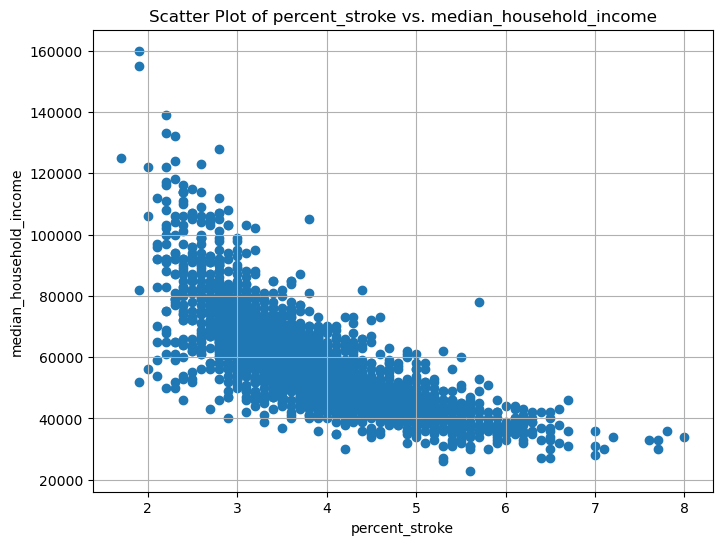

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the data loaded in a DataFrame called 'df' (as in previous examples)

def create_scatter_plot(df, x_col, y_col, output_filename="scatter_plot.png"):
    """
    Creates a scatter plot of two columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        output_filename (str, optional): The filename to save the plot to. Defaults to "scatter_plot.png".
    """
    try:
        # Filter out -1 values and NaN values
        valid_data = df[(df[x_col]!= -1) & (df[y_col]!= -1)].dropna(subset=[x_col, y_col])

        if not valid_data.empty:
            plt.figure(figsize=(8, 6))  # Adjust figure size if needed
            plt.scatter(valid_data[x_col], valid_data[y_col])

            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.title(f"Scatter Plot of {x_col} vs. {y_col}")
            plt.grid(True)

            plt.savefig(output_filename)
            print(f"Scatter plot saved to {output_filename}")
            # plt.show()  # Uncomment to display the plot directly

        else:
            print(f"No valid data (excluding -1) for '{x_col}' and '{y_col}' to create a scatter plot.")

    except KeyError as e:
        print(f"Error: Column '{e.args}' not found in the DataFrame.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Example usage:
create_scatter_plot(df, "percent_stroke", "median_household_income")

In [6]:
import pandas as pd

def find_strongest_correlations(df, threshold=0.5):  # Adjust threshold as needed
    """Calculates the correlation matrix and identifies the strongest correlations.

    Args:
        df (pandas.DataFrame): The DataFrame containing your data.
        threshold (float, optional): The minimum absolute correlation value to consider "strong." Defaults to 0.5.

    Returns:
        pandas.DataFrame: A DataFrame containing the strongest correlations (above the threshold), or None if there's an error.
    """
    try:
        # Convert all columns to numeric, coercing errors to NaN
        df = df.apply(pd.to_numeric, errors='coerce')

        # Calculate the correlation matrix
        correlation_matrix = df.corr()

        # Find the strongest correlations (excluding 1.0 self-correlations)
        strong_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
        strong_correlations = correlation_matrix[strong_correlations]

        # Convert to long format for easier viewing and sorting
        strong_correlations = strong_correlations.stack().reset_index()
        strong_correlations.columns = ['Variable1', 'Variable2', 'Correlation']

        # Sort by absolute correlation value (descending)
        strong_correlations = strong_correlations.sort_values('Correlation', ascending=False)

        return strong_correlations

    except Exception as e:
        print(f"An error occurred: {e}")
        return None



# Example usage (assuming your DataFrame is called 'df'):
strong_correlations = find_strongest_correlations(df)

if strong_correlations is not None:
    if not strong_correlations.empty:
        print(strong_correlations)
    else:
        print("No strong correlations found above the specified threshold.")

    # Optional: Save to CSV
    # strong_correlations.to_csv("strong_correlations.csv", index=False)

                                  Variable1  \
36           percent_coronary_heart_disease   
43                           percent_stroke   
45                 percent_high_cholesterol   
30              percent_high_blood_pressure   
42                           percent_stroke   
29              percent_high_blood_pressure   
35           percent_coronary_heart_disease   
28              percent_high_blood_pressure   
38                           percent_stroke   
5                              poverty_perc   
41                           percent_stroke   
21                          percent_smoking   
37           percent_coronary_heart_disease   
46                 percent_high_cholesterol   
22                       elderly_percentage   
34           percent_coronary_heart_disease   
2                              poverty_perc   
16                          percent_smoking   
20                          percent_smoking   
33           percent_coronary_heart_disease   
27           

Heatmap saved to correlation_heatmap.png


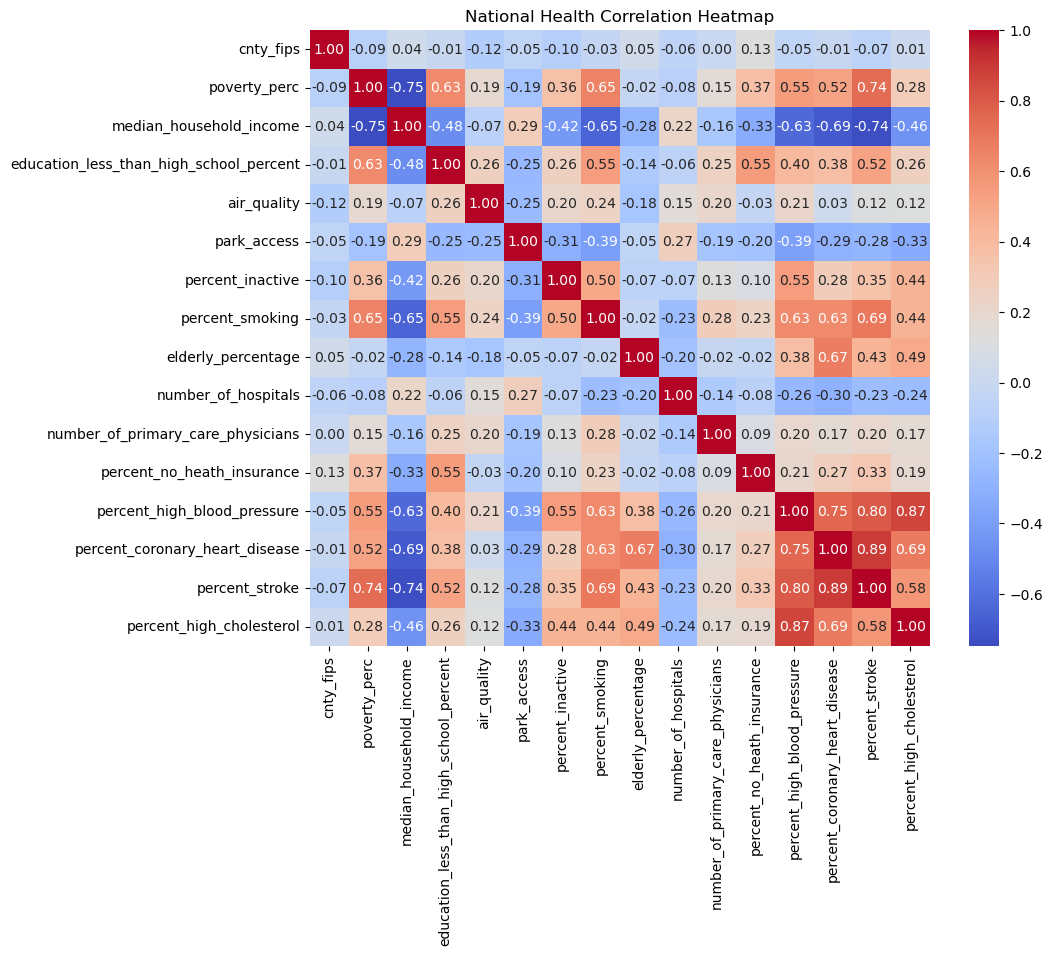

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmaps

# ... (your code to load the data and calculate the correlation matrix) ...

def plot_correlation_heatmap(correlation_matrix, output_filename="correlation_heatmap.png"):
    """Plots a heatmap of the correlation matrix.

    Args:
        correlation_matrix (pandas.DataFrame): The correlation matrix.
        output_filename (str, optional): The filename to save the heatmap to. Defaults to "correlation_heatmap.png".
    """
    try:
        plt.figure(figsize=(10, 8))  # Adjust size as needed
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Annotate with values
        plt.title("National Health Correlation Heatmap")
        plt.savefig(output_filename)
        print(f"Heatmap saved to {output_filename}")
        # plt.show()  # Uncomment to display the plot directly
    except Exception as e:
        print(f"An error occurred while plotting the heatmap: {e}")

correlation_matrix = df.corr() 
plot_correlation_heatmap(correlation_matrix)

Heatmap saved to strong_correlation_heatmap.png


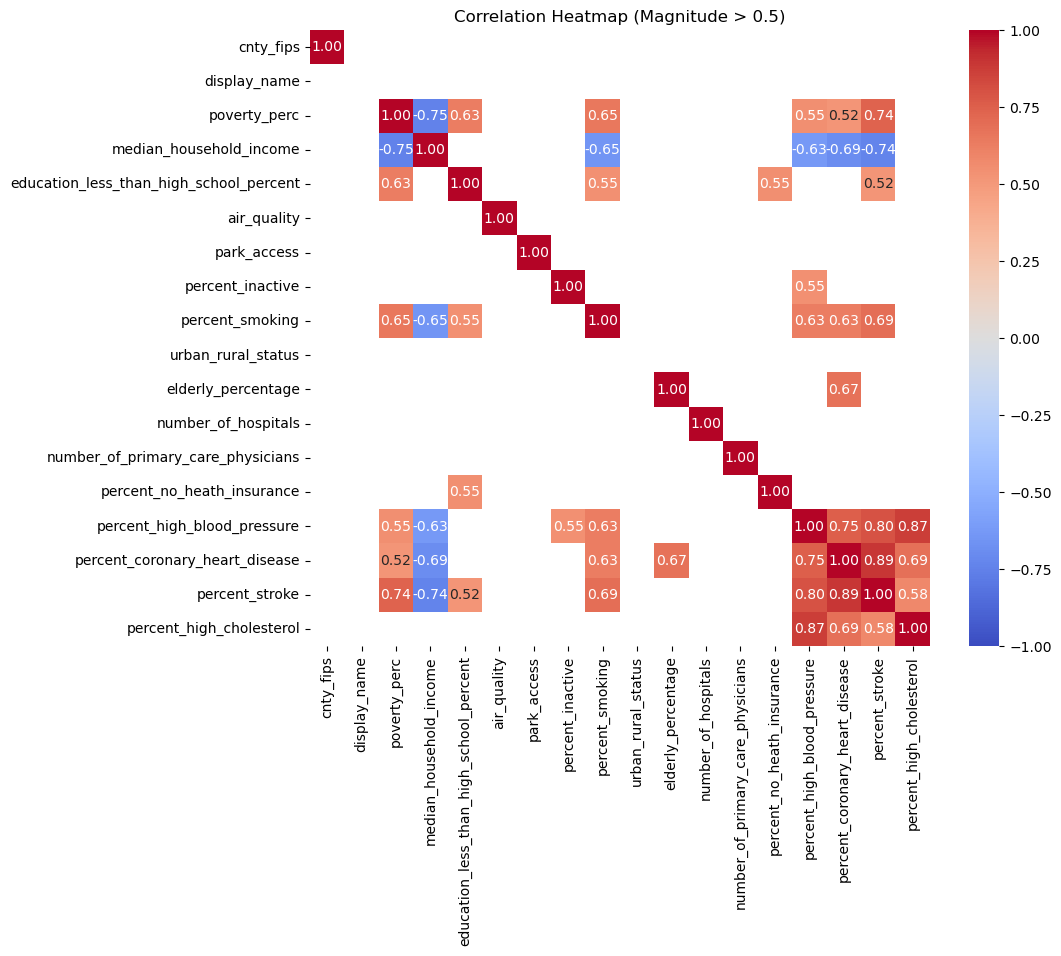

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_strong_correlation_heatmap(df, threshold=0.5, output_filename="strong_correlation_heatmap.png"):
    """Plots a heatmap of the correlation matrix, highlighting values with a magnitude greater than a threshold.

    Args:
        df (pandas.DataFrame): The DataFrame containing your data.
        threshold (float, optional): The minimum absolute correlation value to consider "strong." Defaults to 0.5.
        output_filename (str, optional): The filename to save the heatmap to. Defaults to "strong_correlation_heatmap.png".
    """
    try:
        # Convert all columns to numeric, coercing errors to NaN
        df = df.apply(pd.to_numeric, errors='coerce')

        correlation_matrix = df.corr()

        # Create a mask to hide correlations below the threshold
        mask = np.abs(correlation_matrix) < threshold

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,  vmin=-1, vmax=1) # Set vmin and vmax for colorbar range
        plt.title(f"Correlation Heatmap (Magnitude > {threshold})")
        plt.savefig(output_filename)
        print(f"Heatmap saved to {output_filename}")
        # plt.show()

    except Exception as e:
        print(f"An error occurred while plotting the heatmap: {e}")


# Example usage (assuming 'df' is your DataFrame):
plot_strong_correlation_heatmap(df) # Uses default threshold of 0.5

# To use a different threshold (e.g., 0.7):
# plot_strong_correlation_heatmap(df, threshold=0.7)

Heatmap saved to strong_correlation_heatmap.png


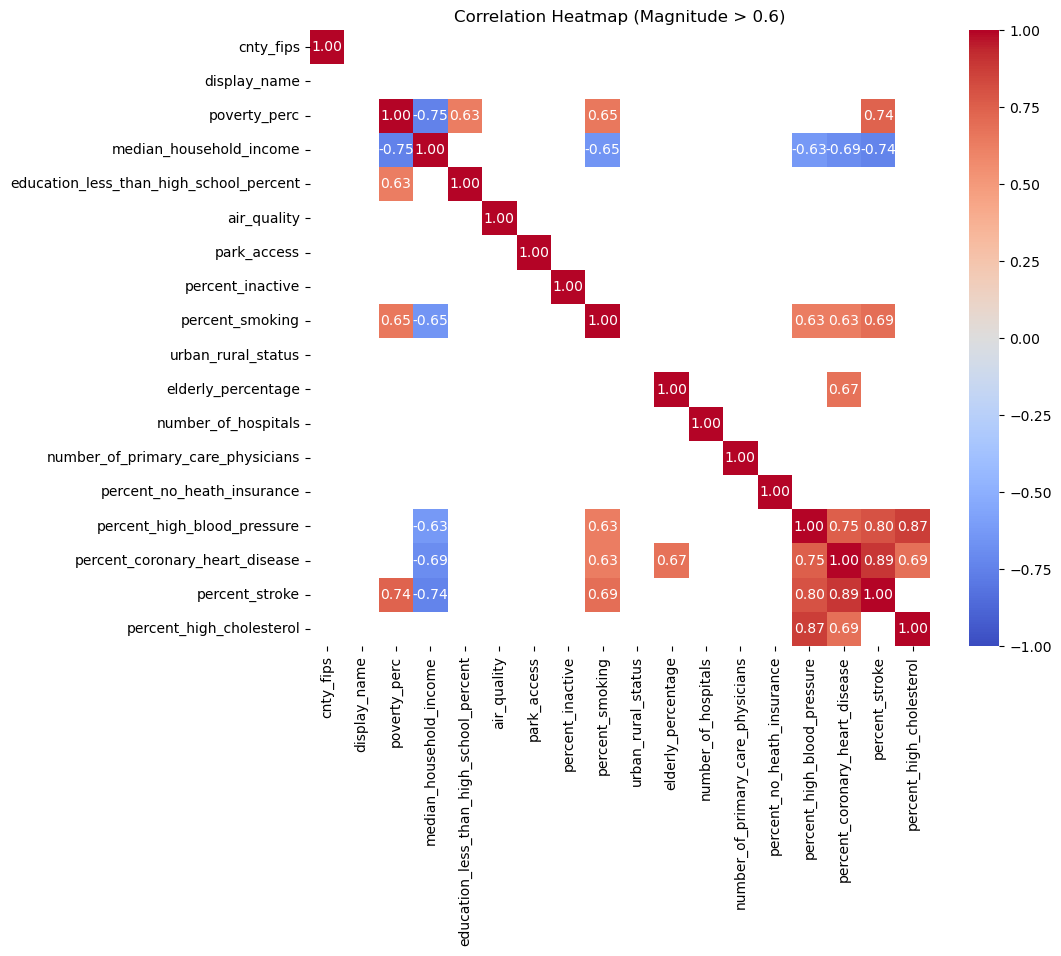

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_strong_correlation_heatmap(df, threshold=0.6, output_filename="strong_correlation_heatmap.png"):
    """Plots a heatmap of the correlation matrix, highlighting values with a magnitude greater than a threshold.

    Args:
        df (pandas.DataFrame): The DataFrame containing your data.
        threshold (float, optional): The minimum absolute correlation value to consider "strong." Defaults to 0.5.
        output_filename (str, optional): The filename to save the heatmap to. Defaults to "strong_correlation_heatmap.png".
    """
    try:
        # Convert all columns to numeric, coercing errors to NaN
        df = df.apply(pd.to_numeric, errors='coerce')

        correlation_matrix = df.corr()

        # Create a mask to hide correlations below the threshold
        mask = np.abs(correlation_matrix) < threshold

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,  vmin=-1, vmax=1) # Set vmin and vmax for colorbar range
        plt.title(f"Correlation Heatmap (Magnitude > {threshold})")
        plt.savefig(output_filename)
        print(f"Heatmap saved to {output_filename}")
        # plt.show()

    except Exception as e:
        print(f"An error occurred while plotting the heatmap: {e}")


# Example usage (assuming 'df' is your DataFrame):
plot_strong_correlation_heatmap(df) # Uses default threshold of 0.5

# To use a different threshold (e.g., 0.7):
# plot_strong_correlation_heatmap(df, threshold=0.7)

In [8]:
import pandas as pd
import re

# Load the CSV file
input_file = "national_health_data_2024.csv"  # Replace with your actual file path
output_file = "parsed_health_data.csv"

# Select relevant columns
columns_to_keep = [
    "cnty_fips", "display_name", "median_household_income", 
    "percent_high_blood_pressure", "percent_coronary_heart_disease", 
    "percent_stroke", "percent_high_cholesterol"
]

# Read CSV while handling quotes properly
df = pd.read_csv(input_file, dtype=str)

# Extract county and state using regex
df[['cnty_name', 'state_name']] = df['display_name'].str.extract(r'\"{0,2}([^,]+), \((\w{2})\)\"{0,2}')

# Keep only necessary columns
df_selected = df[
    ["cnty_fips", "cnty_name", "state_name", "median_household_income", 
     "percent_high_blood_pressure", "percent_coronary_heart_disease", 
     "percent_stroke", "percent_high_cholesterol"]
]

# Remove rows where any relevant column contains '-1'
df_selected = df_selected[~df_selected[['median_household_income', 'percent_high_blood_pressure', 
                                         'percent_coronary_heart_disease', 'percent_stroke', 
                                         'percent_high_cholesterol']].isin(['-1']).any(axis=1)]

# Save to a new CSV file
df_selected.to_csv(output_file, index=False)

print(f"Parsed data saved to {output_file}")

print(f"Parsed data saved to {output_file}")


Parsed data saved to parsed_health_data.csv
Parsed data saved to parsed_health_data.csv
